In [1]:
import os 
os.listdir()

['second_model.ipynb',
 'train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'three_model.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(130795, 31)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B22,MLPAP_TI-0706B24,MLPAP_TI-0716A09,...,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,421.996112,424.995929,398.999278,397.000005,394.002688,391.997199,391.004787,392.001755,392.004498,403.000684,...,34.707643,49.114940,34.926437,62.161964,181.607147,4.215451,13.177441,0.056350,0.054001,0.914110
2016-05-10 08:20:00,421.996112,425.041541,398.999278,397.000005,394.002688,391.997199,391.004787,392.001755,392.100484,403.000684,...,35.980597,49.137430,35.494560,62.267876,181.084756,4.236381,13.231014,0.084738,0.054001,0.919733
2016-05-10 08:30:00,421.996112,425.109958,398.999278,397.000005,394.002688,391.997199,391.004787,392.001755,392.004498,403.000684,...,33.797872,49.135555,34.616724,62.465860,177.599662,4.227079,13.221490,0.091835,0.054001,0.926436
2016-05-10 15:40:00,421.715731,427.687003,399.252972,395.446261,392.002989,389.622951,388.497742,390.200259,390.052790,403.578089,...,33.567251,49.169289,35.013840,62.394249,178.771310,4.248009,15.014401,0.496363,0.054001,0.887063
2016-05-10 23:40:00,421.003993,428.097506,397.996033,393.996100,390.654621,388.002611,387.000171,388.999261,388.197068,403.000684,...,35.167069,49.143052,34.719328,62.322638,182.122076,4.245102,15.637040,0.208935,0.054001,0.906869


# split

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
y = df['target']

train_len = int(len(df)*0.8)
X_train = X[:train_len]
X_test = X[train_len:]
y_train = y[:train_len]
y_test = y[train_len:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((104636, 30), (26159, 30), (104636,), (26159,))

# fit

In [6]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

model = XGBRegressor(objective="reg:squarederror")
model.fit(X_train, y_train)

/workspace/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/workspace/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# eval

In [7]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred,name='y_pred',index=y_test.index)
print(r2_score(y_test,y_pred))
print(round(mean_squared_error(y_test,y_pred),4))

-1.0477223607030326
0.0002


# plot

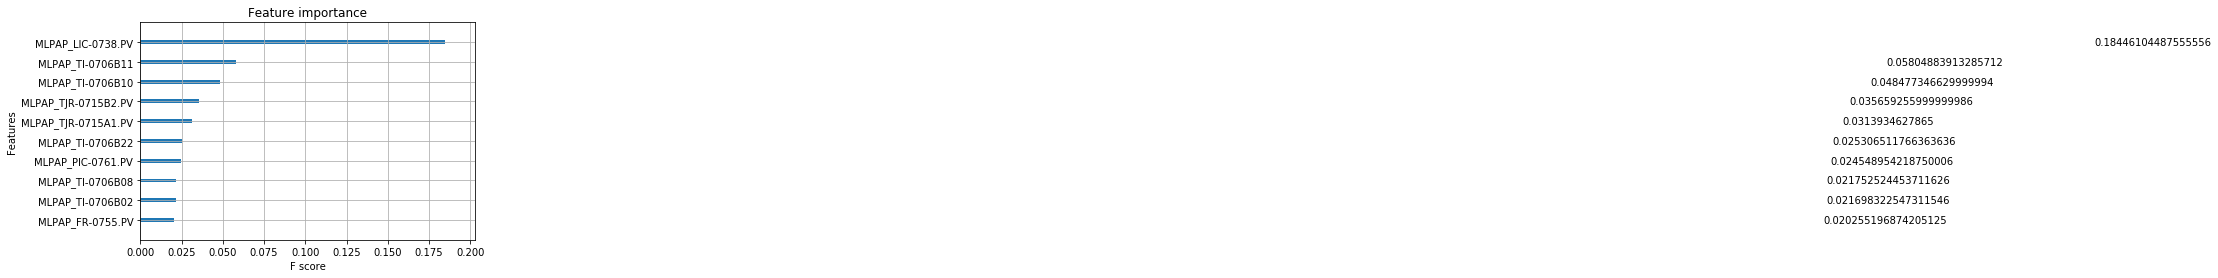

In [8]:
import xgboost
xgboost.plot_importance(model,max_num_features=10,importance_type="gain")
plt.show()

In [9]:
chmap = pd.read_excel('tag盤點表.xlsx')[['TAG','chinese']]
chmap = dict(zip(chmap['TAG'],chmap['chinese']))

In [13]:
FIMP = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['imp'])
FIMP['中文'] = FIMP.index.map(chmap)
FIMP = FIMP.sort_values(by='imp',ascending=False)
FIMP[['中文','imp']].head(10)

,中文,imp
MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,0.266167
MLPAP_TI-0706B11,反應槽溫度_多點式(高度 1150),0.083761
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.069950
MLPAP_TJR-0715B2.PV,鹽浴溫度,0.051454
MLPAP_TJR-0715A1.PV,反應槽溫度_多點式(高度 2450),0.045299
MLPAP_TI-0706B22,反應槽溫度_多點式(高度 2250),0.036516
MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,0.035423
MLPAP_TI-0706B08,反應槽溫度_多點式(高度 850),0.031388
MLPAP_TI-0706B02,反應槽溫度_多點式(高度 250),0.031309
MLPAP_FR-0755.PV,反應槽16K蒸氣輸出,0.029227


In [11]:
y_test = y_test.sort_index()
y_pred = y_pred.sort_index()

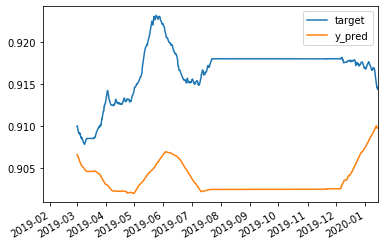

In [12]:
y_test.rolling(6*24*30).mean().plot()
y_pred.rolling(6*24*30).mean().plot()
plt.legend()